In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode


In [2]:
# Load features and labels
X_train = np.load("../data/features/X_train.npy")
X_val   = np.load("../data/features/X_val.npy")
X_test  = np.load("../data/features/X_test.npy")

y_train = np.load("../data/features/y_train.npy")
y_val   = np.load("../data/features/y_val.npy")
y_test  = np.load("../data/features/y_test.npy")

with open("../data/features/class_names.json", "r") as f:
    class_names = json.load(f)

print("Train features:", X_train.shape)
print("Val features:", X_val.shape)
print("Test features:", X_test.shape)
print("Class names:", class_names)


Train features: (594, 2048)
Val features: (127, 2048)
Test features: (128, 2048)
Class names: {'beagle': 0, 'chihuahua': 1, 'german_shepherd': 2, 'golden_retriever': 3, 'pug': 4}


In [3]:
# Combine into full dataset
X = np.concatenate([X_train, X_val, X_test], axis=0)
y = np.concatenate([y_train, y_val, y_test], axis=0)

print("Full dataset shape:", X.shape)
print("Full label shape:", y.shape)


Full dataset shape: (849, 2048)
Full label shape: (849,)


In [4]:
# Run K-Means
kmeans = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(X)
cluster_labels = kmeans.labels_
print("K-Means completed. Inertia:", kmeans.inertia_)


K-Means completed. Inertia: 148262.0


In [5]:
# Map clusters → real labels
def map_clusters_to_labels(true_labels, cluster_labels, k=5):
    mapped = np.zeros_like(cluster_labels)
    for i in range(k):
        mask = (cluster_labels == i)
        if np.sum(mask) == 0:
            continue
        mapped[mask] = mode(true_labels[mask])[0]
    return mapped

predicted_labels = map_clusters_to_labels(y, cluster_labels, k=5)


In [6]:
# Accuracy
accuracy = accuracy_score(y, predicted_labels)
print("K-Means Clustering Accuracy:", accuracy)


K-Means Clustering Accuracy: 0.9882214369846879


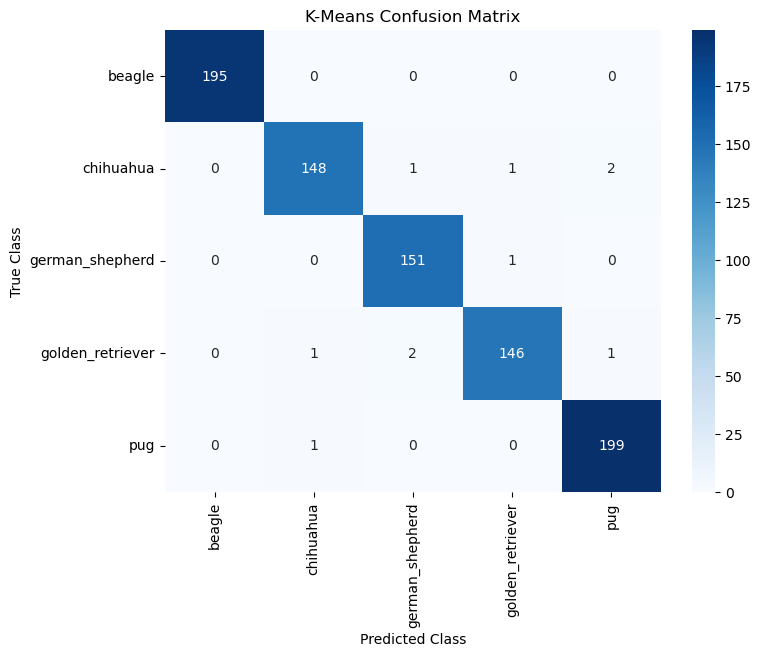

In [7]:
# Confusion Matrix
cm = confusion_matrix(y, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("K-Means Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


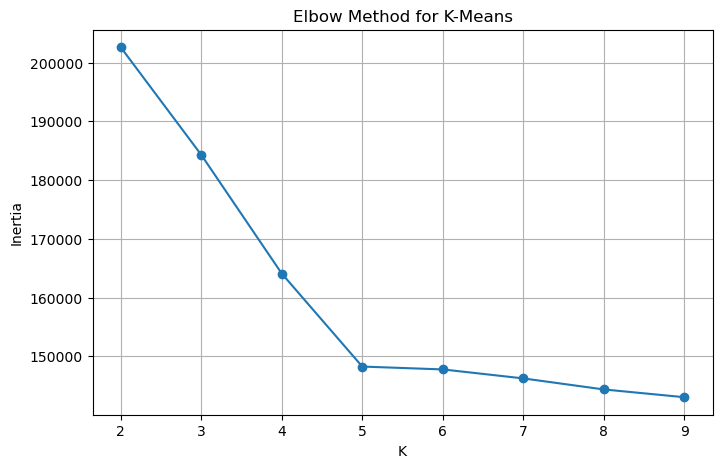

In [8]:
# Elbow Curve
inertia_values = []
K_values = range(2, 10)

for k in K_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker="o")
plt.title("Elbow Method for K-Means")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
